Firstly, we will load the data and try to get some conclusions about the type of the data and do the preliminary analysis.

In [27]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [28]:
with open('./ass2.pickle', 'rb') as handle:
        data = pickle.load(handle)

In [29]:
X, y = data['train']
df = pd.DataFrame(X)
df['target'] = pd.DataFrame(y)

In [30]:
print(df.shape)
df.describe()

(16280, 15)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,target
count,16280.000000,16280.000000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,38.681880,3.871499,1.906293e+05,10.293919,10.072727,2.606143,6.586794,1.441462,3.666953,0.667260,1052.069595,90.635442,40.496437,36.653010,0.240786
std,13.635203,1.456100,1.053524e+05,3.854012,2.577408,1.509407,4.232982,1.606590,0.846983,0.471209,7369.365288,410.807079,12.478762,7.915686,0.427574
min,17.000000,0.000000,1.882700e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.188722e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.787780e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.374378e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.184622e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


First, we can notice that we have about 16.3K samples. By looking at the shape of the dataset, we can conclude that we have 14 features. We can see that all of the features are numerical. The ranges of the values are not the same, for example f1 is between 0-8 and f2 is between 18,827 to 1,184,622. Therefore we can consider to scale the values.
Lets take a more specific look at the data.

In [31]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(6, 15)

We can see that we have only about 6 duplicated rows, which is a negligible amount, so we won't take care of it.

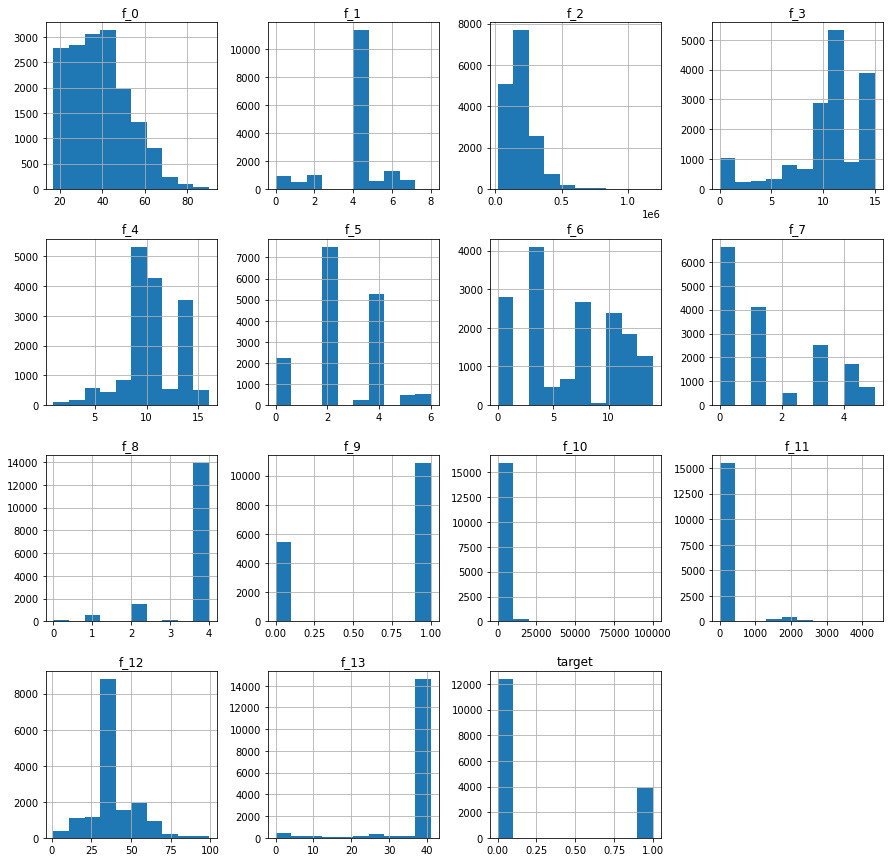

In [12]:
histogram = df.hist(figsize=(15, 15))

First, we can see from the "target" column that the supplied train dataset is **unbalanced**.
about 12K rows with class 0 VS 4K rows with class 1.
We will balance this later.
Also, we can see that **f10, f11, f13** have almost everywhere the **same** value.
We will check if they affect the target, and maybe remove them with in the **feature-selection** part.

Next, lets check for missing values.

In [13]:
df.isnull().sum().sort_index()

f_0       0
f_1       0
f_10      0
f_11      0
f_12      0
f_13      0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
target    0
dtype: int64

We can see that there are no missing values. Next, lets check the correlation between the different features and try to get more knowledge about the data

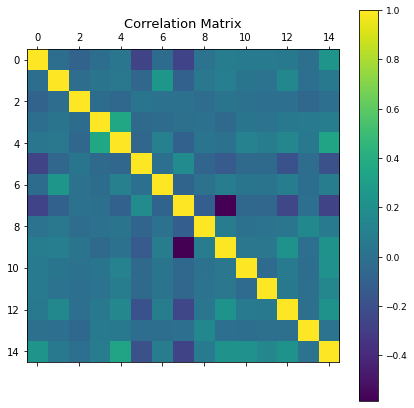

In [14]:
f = plt.figure(figsize=(7, 7))
plt.matshow(df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)
plt.title('Correlation Matrix', fontsize=13);
plt.show()

Unfortunately, there is no obvious linear correlation between the diffrent features. Maybe a small negative linear correlation between f9 and f7. Hence, we may only need one of them. We will check that later in the feature selection part. Also, f3 and f4 are also seem a little bit correlated.

To select the right model, we shall look at the train dataset as the whole data we have, and split it into train and test. We keep a random state, so that the results won't change due to the randomality of the split.
We want a validation test because we are conducting expereminets, and check their results on a "test set" which should be disjoint from the real test, so we won't have data-leaks and make desicions on a model which was trained on some data from the test dataset.

In [62]:
X = df.drop(columns = ['target']).copy()
y = df['target']

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 42)

**Data Balancing**-
Next, let's try to handle with the fact that the dataset is imbalanced. We have serveral options: One is the decrease the size of the dataset and remove samples from the samples with the major class. Another one, is try to duplicate and change a little bit the samples from the other class. The last option we can think of, is to select a metric which takes into account the fact that the data is imbalanced. For example the balanced_accuracy_score metric. 
We will try the 3 methods with a well known algorithm, such as AdaBoost and see what are the differences between the 3 methods.

undersamples dataset balanced accuracy score:  0.8285398585663774
undersamples dataset accuracy score:  0.8224815724815725
undersamples dataset f1 score:  0.7035897435897436

oversamples dataset balanced accuracy score:  0.8129781420765028
oversamples dataset accuracy score:  0.8028255528255528
oversamples dataset f1 score:  0.6793206793206794

original dataset balanced accuracy score:  0.7744093539054966
original dataset accuracy score:  0.8562653562653563
original dataset f1 score:  0.680327868852459


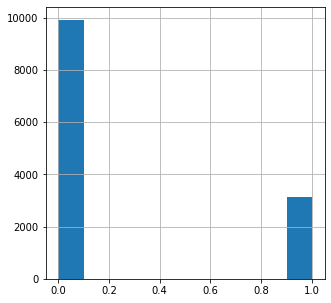

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils import resample
import random

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

import matplotlib.pyplot as plt

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)

oversampled_X, oversampled_y = ros.fit_resample(X_train, y_train)
undersampled_X,undersampled_y = rus.fit_resample(X_train, y_train)
histogram = y_train.hist(figsize=(5, 5))


train_dataset = pd.concat([X_train, y_train], axis=1)

class0_samples = train_dataset[y_train == 0]
class1_samples = train_dataset[y_train == 1]

#undersample - select less from majority class
class0_selected_idx = random.sample(class0_samples.index.tolist(), len(class1_samples))
class0_selected_samples = class0_samples.loc[class0_selected_idx]
undersampled_df = pd.concat([class0_selected_samples, class1_samples], axis=0)
undersampled_X = undersampled_df.loc[:,  undersampled_df.columns != "target"]
undersampled_y = undersampled_df['target']
clf = AdaBoostClassifier().fit(undersampled_X, undersampled_y)
y_pred = clf.predict(X_valid)
print('undersamples dataset balanced accuracy score: ', balanced_accuracy_score(y_valid, y_pred))
print('undersamples dataset accuracy score: ', accuracy_score(y_valid, y_pred))
print('undersamples dataset f1 score: ', f1_score(y_valid, y_pred))

#oversample - add samples to the minority class
class1_extra_samples = resample(class1_samples, replace=True, n_samples=len(class0_samples))
oversampled_df = pd.concat([class0_samples, class1_extra_samples], axis=0)
oversampled_X = oversampled_df.loc[:,  oversampled_df.columns != "target"]
oversampled_y = oversampled_df['target']

oversampled_X = X_resampled
oversampled_Y = y_resampled

clf = AdaBoostClassifier().fit(oversampled_X, oversampled_y)
y_pred = clf.predict(X_valid)
print('\noversamples dataset balanced accuracy score: ', balanced_accuracy_score(y_valid, y_pred))
print('oversamples dataset accuracy score: ', accuracy_score(y_valid, y_pred))
print('oversamples dataset f1 score: ', f1_score(y_valid, y_pred))


#choose another metric (which is not accuracy_score)
clf = AdaBoostClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_valid)
print('\noriginal dataset balanced accuracy score: ', balanced_accuracy_score(y_valid, y_pred))
print('original dataset accuracy score: ', accuracy_score(y_valid, y_pred))
print('original dataset f1 score: ', f1_score(y_valid, y_pred))


From looking at the balanced accuracy score, which takes into consideration the proportions of each class, that changing the dataset is better(whether we remove or add samples). There is no major difference between oversampling and undersampling, but we would rather to add data so we won't lose data, so we will choose to oversample the data

In [65]:
X_train, y_train = oversampled_X, oversampled_y

Next, lets do some feature selection. We expect to see that f10, f11 and f13 are not very informative for the classification, since their variance is pretty low (according to the histogram)

We will try two methods. The first one is to manually remove f10, f11 and f13 and see how it affects the model. The second one is to let a feature selection algorithm to remove 3 features and see if the algoritm chooses to remove f10, f11 and f13.

In [66]:
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#(1) manually remove
X_train_manually_removed_features = X_train.copy().drop(columns=['f_10', 'f_11', 'f_13'])
X_valid_manually_removed_features = X_valid.copy().drop(columns=['f_10', 'f_11', 'f_13'])
y_pred = XGBClassifier().fit(X_train_manually_removed_features, y_train).predict(X_valid_manually_removed_features)
print('Manual selection accuracy score: ', balanced_accuracy_score(y_valid, y_pred))

#(2) SelectKBest
selected_features_algorithm = SelectKBest(chi2, k=11).fit(X_train,y_train)
X_train_algorithm_removed_features = selected_features_algorithm.transform(X_train)
X_valid_algorithm_removed_features = selected_features_algorithm.transform(X_valid)
y_pred = XGBClassifier().fit(X_train_algorithm_removed_features, y_train).predict(X_valid_algorithm_removed_features)
print('SelectKBest accuracy score: ', balanced_accuracy_score(y_valid, y_pred))


Manual selection accuracy score:  0.812970106075217
SelectKBest accuracy score:  0.8272862423657987


Oh well, I guess my intuition is not that good. We will stick with SelectKBest algorithm. But lets now run another last test to find the best number of features:

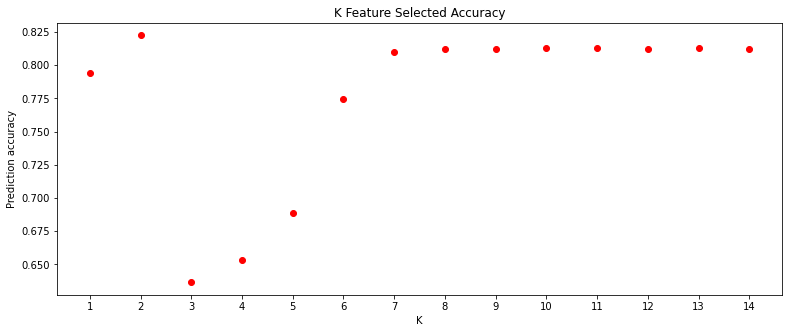

[0.7942260442260443, 0.8224815724815725, 0.6363636363636364, 0.652948402948403, 0.6885749385749386, 0.7745700245700246, 0.8101965601965602, 0.812039312039312, 0.812039312039312, 0.8132678132678133, 0.8132678132678133, 0.812039312039312, 0.8132678132678133, 0.812039312039312]


In [67]:
results = []
k_list = list(range(1,15))
for i in k_list:
    selected_features = SelectKBest(chi2, k=i).fit(X_train, y_train)
    selected_X_train = selected_features.transform(X_train)
    selected_X_valid = selected_features.transform(X_valid)
    clf = XGBClassifier().fit(selected_X_train, y_train)
    y_pred = clf.predict(selected_X_valid)
    results.append(accuracy_score(y_valid, y_pred))

plt.figure(figsize=(13,5))
plt.title('K Feature Selected Accuracy')
plt.xlabel('K')
plt.ylabel('Prediction accuracy')
plt.scatter(k_list, results, marker='o', color='red')   
plt.xticks(k_list)
plt.show()
print(results)

We can see that from k=9, the model accuracy does not change a lot. k=12 is the best, but the difference is minor. We will pick k=12.

In [68]:
selected_features = SelectKBest(chi2, k=12).fit(X_train, y_train)
print('The selected features are: ', selected_features.get_feature_names_out())

The selected features are:  ['f_0' 'f_2' 'f_3' 'f_4' 'f_5' 'f_6' 'f_7' 'f_9' 'f_10' 'f_11' 'f_12'
 'f_13']


In [69]:
X_train = selected_features.transform(X_train)
X_valid = selected_features.transform(X_valid)
X_test = selected_features.transform(X_test)

Now, lets try to scale the data a little bit

In [70]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

Now, after we cleaned the data and changed it a little bit, the next step is to select the right classification algorithm! For that purpose we check some known classification models, and see which one is the best.

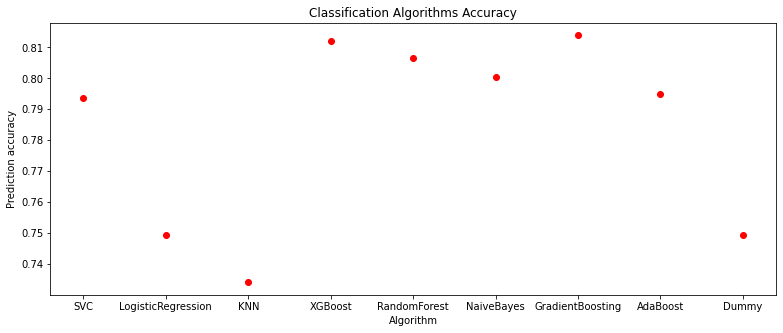

In [71]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [
          ('SVC', SVC()), 
          ('LogisticRegression', LogisticRegression(max_iter=15000)), 
          ('KNN', KNeighborsClassifier()),
          ('XGBoost', XGBClassifier()),
          ('RandomForest', RandomForestClassifier()),
          ('NaiveBayes', GaussianNB()),
          ('GradientBoosting', GradientBoostingClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('Dummy', DummyClassifier())
         ]

names = [name for (name, model) in models]
results = []

for name,model in models:
    clf = model.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_valid_scaled)
    results.append(accuracy_score(y_valid, y_pred))
    

#some plotting configurations
x = np.array(range(len(models)))
plt.figure(figsize=(13,5))
plt.title('Classification Algorithms Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Prediction accuracy')
plt.scatter(x, results, marker='o', color='red')   
plt.xticks(x, names)
plt.show()


From that experiment, we can see that the strongest algorithm is XGboost / GradientBoosting / RandomForest is also pretty good. So we will stick with that. In the next part, we will try to see which one is the best.
We will try and find the best hyper-parameters for each algorithm.

In the RandomForest algorithm, we will try and get the optimal values for the next hyper-parameters: n_estimators, max_depth, min_samples_split, max_features, bootstrap

We will do a Hyper Parameter search, using RandomizedSearch.


In [ ]:
params = {
    'n_estimators': [100, 200, 300 ,500, 1000],
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 8, 10, 12],
    'min_samples_leaf': [1, 3, 4, 5]
}

random_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = random_forest, param_grid = params, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_scaled, y_train)

In [ ]:
print(grid_search.best_params_)

We get that the best parms are:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Lets apply those and check accuracy

In [79]:
optimized_random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500)
optimized_random_forest.fit(X_train_scaled, y_train)
y_pred = optimized_random_forest.predict(X_valid_scaled)
result = balanced_accuracy_score(y_valid, y_pred)
print("Random forest with hyper parms: " ,result)

Random forest with hyper parms:  0.8227981356477017


In [80]:
clf = RandomForestClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_valid_scaled)
result = balanced_accuracy_score(y_valid, y_pred)
print("Random forest with hyper parms: ",result)

Random forest with hyper parms:  0.746914175506268


We can see the hyper parms were not an improvment :(

**Lets try with XGBoost!**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train_scaled, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:21] WARNING: /workspace/src/objective/regr

After LONG 22 minutes, we found the best parameters:
{'subsample': 0.8999999999999999, 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}

With the lowest RMSE:  0.2463389673578116


Now lets run the model with the Hyper Parameters found:


In [45]:
model = XGBClassifier(subsample=0.8999999999999999,n_estimators=1000,max_depth= 20,learning_rate =0.01,colsample_bytree= 0.7,colsample_bylevel= 0.5)
#'subsample': 0.8999999999999999, 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5
clf = model.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_valid_scaled)
result = accuracy_score(y_valid, y_pred)
print(result)

0.8667076167076168


And we get accuracy of 0.867, an improvment from 0.812 we got when comparing the models.

"subsample" is the fraction of the training samples (randomly selected) that will be used to train each tree.

"colsample_by_tree" is the fraction of features (randomly selected) that will be used to train each tree.

"colsample_bylevel" is the fraction of features (randomly selected) that will be used in each node to train each tree.

"n_estimators" is the number of runs XGBoost will try to learn

"learning_rate" is the learning speed